# <span style="color:darkorange"> Exercises 01 (NSL) </span>
# <span style="color:darkorange"> 01.1: Monte Carlo integration </span>

## 01.1.1: 

A simple application of pseudo-random numbers is the <span style='color: darkorange;'>estimation of integrals</span> of functions, like $\langle r \rangle = \int_0^1 r dr = 1/2$. For such a function (this is rarely the case), it is easy to <span style='color: darkorange;'>check the agreement</span> with the exact solution and thus get insight about the predictive power of Monte Carlo integration.

To get a better estimate, <span style='color: darkorange;'>data blocking</span> is employed. The key idea is that a Monte Carlo process with $M$ (here $10^6$) steps can be divided into $N$ (here $500$) blocks of length $L=M/N$.
Since the average method for estimating an integral of a function $I=\int_{\Omega}f d\mu$ involves calculating $f(x)$ at $M$ points, one can also estimate $I$ with less ($L=M/N$) points, but for $N$ times. These estimates are the entries of the vector of the $A_i$s, which then yields the mean as an even better estimate for $I$.

The plot illustrates that the <span style='color: darkorange;'>estimate of $\langle r \rangle$ approaches the actual value</span> of the integral. The <span style='color: darkorange;'>uncertainty</span>, represented by the vertical bars and calculated as the standard deviation of the mean, i.e.
$$ \frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{ \frac{1}{N-1} 
\left[ \frac{1}{N} \sum_{i=1}^N \left[A_i - \left( \frac{1}{N} \sum_{j=1}^N A_j \right)\right]^2 \right] } $$
<span style='color: darkorange;'>decreases</span> as more blocks are taken into account. 


Note that, in the C++ code, the $A_i$ vector is first created and then, to show the just discussed progression, it is <span style='color: darkorange;'>truncated</span> to vectors of increasing length (from $2$ to $N$ blocks), and, each time, the average and the standard deviation of the mean are evaluated anew.

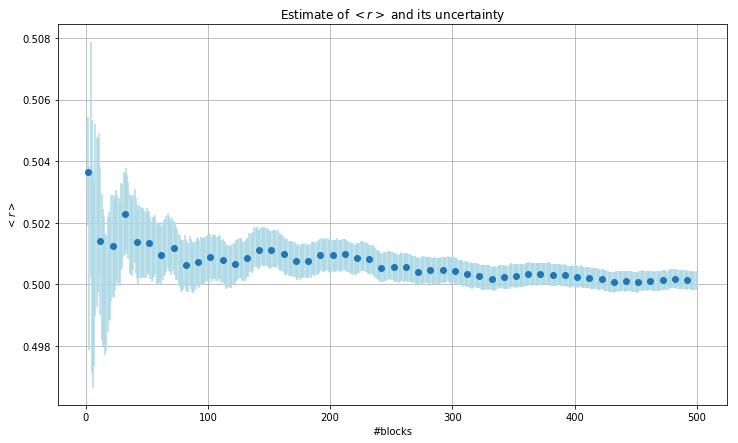

In [13]:
import matplotlib.pyplot as plt 
import numpy as np

# Initialize lists to store data
x = [] # Number of blocks
y = [] # Integral estimate
error_bars = [] # Uncertainty of the integral estimate

# Read the number of lines in the 'averages.dat' file to determine the number of blocks
with open(r"averages.dat", 'r') as fp:
    N = len(fp.readlines())
    x = np.arange(N)

# The number of blocks goes from 2 (bare minimum to compute std. dev.) to N
x = x + 2

# Read and convert data from 'averages.dat' to float
with open('averages.dat', 'r') as file:
    for line in file:
        y.append(float(line))

# Read and convert data from 'errors.dat' to float
with open('errors.dat', 'r') as file:
    for line in file:
        error_bars.append(float(line))

# Set a larger figure size (adjust the numbers as needed)
plt.figure(figsize=(12, 7))

# Plot the data with error bars
plt.errorbar(x, y, yerr=error_bars, fmt='o', ecolor='lightblue', markevery=10)  # fmt='o' adds markers to data points

# Add labels to the plot
plt.xlabel('#blocks')
plt.ylabel('$<r>$')
plt.title('Estimate of $<r>$ and its uncertainty')

# Display grid in the plot
plt.grid(True)

# Show the plot
plt.show()

## 01.1.2: 

It is also possible to make a picture of the <span style='color: darkorange;'>estimate of $\sigma^2$ and its uncertainty</span>. The task to fulfil differs from section **01.1.1** in nothing but the integrand: $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$.

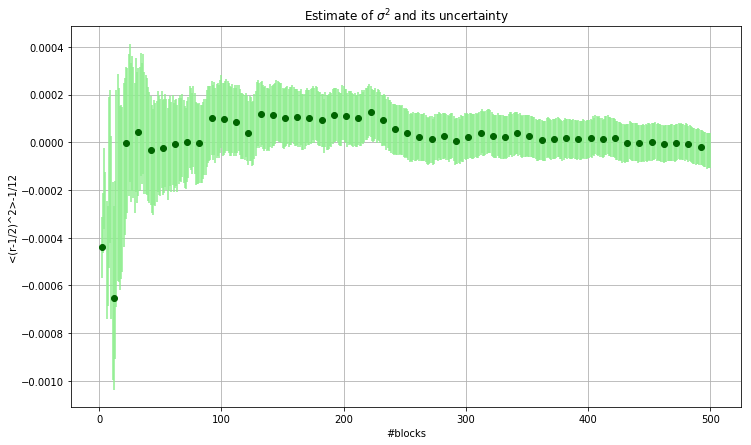

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2, len(open('variance_averages.dat').readlines()) + 2)
y = np.loadtxt('variance_averages.dat')-1./12. # subtract 1/12 to take the result to zero
error_bars = np.loadtxt('variance_errors.dat')

plt.figure(figsize=(12, 7))
plt.errorbar(x, y, yerr=error_bars, fmt='o', color='darkgreen', ecolor='lightgreen', markevery=10)
plt.xlabel('#blocks')
plt.ylabel('<(r-1/2)^2>-1/12')
plt.title('Estimate of $\sigma^2$ and its uncertainty')
plt.grid(True)
plt.show()

## 01.1.3: 

Suppose $n$ numbers are <font color="darkorange">uniformly sampled</font> on an interval $[a,b]\subset{\rm I\!R}$. Then $np$ of those numbers are <font color="darkorange">expected</font> to fall <font color="darkorange">within a sub-interval</font> $[a',b']\subseteq[a,b]$, where the probability $p$ is obtained as the ratio between the measures of the intervals, i.e. $p=(b'-a')/(b-a)$.

If, for example, $[0,1]$ is partitioned into $M$ identical sub-intervals, then $p=1/M$ and the <font color="darkorange">$\chi^2$ Pearson's cumulative test</font> may warn whether the hypothesis that the numbers are <font color="darkorange">not drawn</font> from a uniform distribution can be safely <font color="darkorange">discarded</font>. 

The plot shows the <font color="darkorange">fluctuation of  $\chi^2_j$</font> around its mean value, as $M$ experiments (indexed by $j$) are carried out. The density of sub-intervals is fixed to $M=100$, being
$$\chi^2_j = \sum_{i=1}^M \frac{\left( n^{(j)}_i - n/M \right)^2}{n/M}$$

with $n^{(j)}_i$ being the tally of numbers fallen within the $i$-th sub-interval and $n$ the number of draws (here $10^4$), for each repetition $j$. On average, $(n^{(j)}_i - n/M)^2 \simeq n/M$, therefore $\chi^2_j \simeq M$, i.e. <font color="darkorange">the number of sub-intervals</font>.

For the sake of <font color="darkorange">comparison</font> of the obtained histogram with the actual distribution, see the <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution"> Wikipedia page</a>.

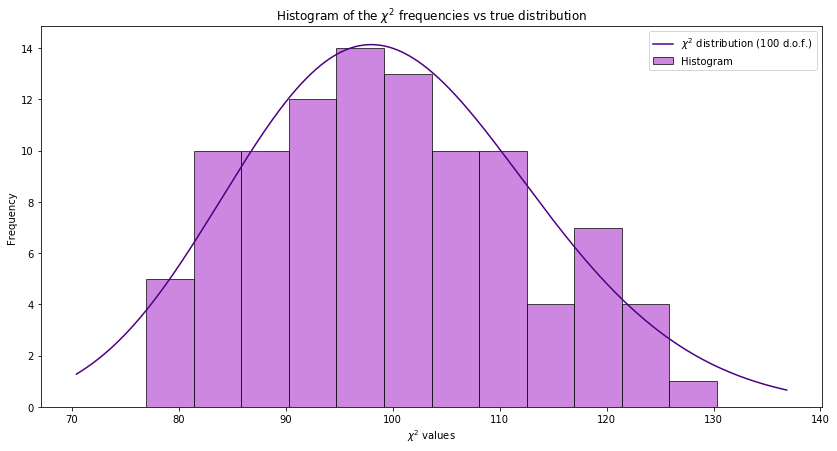

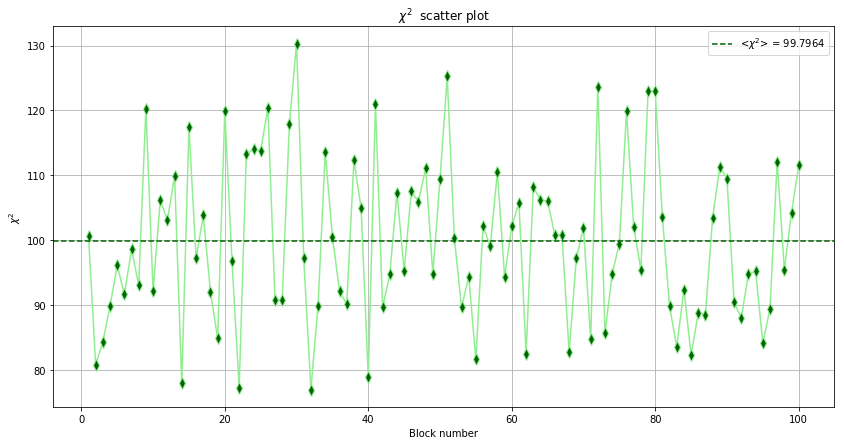

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# Load data
x = np.arange(1, len(open('chi_sq.dat').readlines()) + 1)
y = np.loadtxt('chi_sq.dat')
z = np.linspace(min(y)-0.05*max(y), max(y)*1.05, 1000)  # Adjust the range of z so that it encompasses the histogram bins

# FIGURE 1

# Plot histogram
plt.figure(figsize=(14, 7))  # Create the first figure
n, bins, patches = plt.hist(y, bins=12, color='mediumorchid', edgecolor='black', alpha=0.7, label='Histogram')
plt.xlabel('$\chi^2$ values')
plt.ylabel('Frequency')
plt.title('Histogram of the $\chi^2$ frequencies vs true distribution')

# Get the maximum frequency from the histogram
max_freq = max(n)

# Plot Chi-square distribution with 100 degrees of freedom
scaling_factor = max_freq / chi2.pdf(100, 100)  # Scale Chi-square distribution
plt.plot(z, chi2.pdf(z, df=100) * scaling_factor , label='$\chi^2$ distribution (100 d.o.f.)', color ='indigo')
plt.legend()
plt.show()

# FIGURE 2

# Plot the j-th result for \chi^2
plt.figure(figsize=(14, 7))  # Create the second figure
plt.plot(x, y, 'o', ls='-', ms=8, color='lightgreen', markerfacecolor='darkgreen',marker='d') #ms=markersize
mean_chi2=np.nanmean(y)
plt.axhline(y=mean_chi2, color='darkgreen', label='<$\chi^2$> = '+str(mean_chi2), ls='dashed' ) #ls=linestyle
plt.xlabel('Block number')
plt.ylabel(r'$\chi^2$')
plt.title('$\chi^2$  scatter plot')
plt.grid(True)
plt.legend()
plt.show()

In [1]:
%%HTML
<iframe src="https://en.wikipedia.org/wiki/Chi-squared_distribution" width="800" height="400" title="Chi-squared distribution"></iframe>

# <span style="color:darkorange"> 01.2: sampling random variables: validity check of the CLT</span>

## 01.2.1:

It can be shown that, given a one-dimensional random variable $x$ that undergoes some <font color="darkorange">monotonic transfom</font> from a domain $D_x$ into $D_y$
$$ x \mapsto y = y(x) $$
its <font color="darkorange">PDF (probability density function)</font> $p_x(x)$ is mapped to $p_y(y)$ according to
$$ p_y(y) = p_x(x)\left| \frac{dy}{dx}(x) \right|^{-1}$$
The theorem holds in particular for the transfom which is exatcly equal to the <font color="darkorange">cumulative distribution</font> $y = F_x(x) = \int_a^x p_x(t) dt$ of a random variable $x\in(a,b)$ which follows the PDF $p_x(x)$. If $y(x)$ is known and analytically <font color="darkorange">invertible</font>, then it is possible to <font color="darkorange">sample $x$ according to its PDF</font>, since <font color="darkorange">$y$</font> is <font color="darkorange">uniformly distributed</font> on the range of $x \mapsto y$.

The just discussed procedure allows to produce numbers extracted according to the 1. <font color="darkorange">exponential</font> and to the 2. <font color="darkorange">Lorentzian</font> distributions

$$ 1. \quad p_{exp}(x) = \lambda \exp(-\lambda x), \quad x\in [0;+\infty) \quad\quad\quad 2. \quad p_{Lor}(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}, \quad x\in (-\infty;+\infty) $$

where $\lambda$, $\Gamma \in {\rm I\!R}^+$ and $\mu \in {\rm I\!R}$ are <font color="darkorange">parameters</font> of the distributions, just by sampling $y=F_x(x)=\int_a^x p_x(t)dt$ uniformly on $[0,1)$ and then <font color="darkorange">inverting</font> $y(x)$, i.e.

$$ 1. \quad x_{exp} = -\frac{1}{\lambda}\ln \left( 1-y \right)\quad\quad\quad 2. \quad x_{Lor}= \mu + \Gamma \tan \left[  \pi \left( y-\frac{1}{2} \right) \right] \quad\quad\quad $$

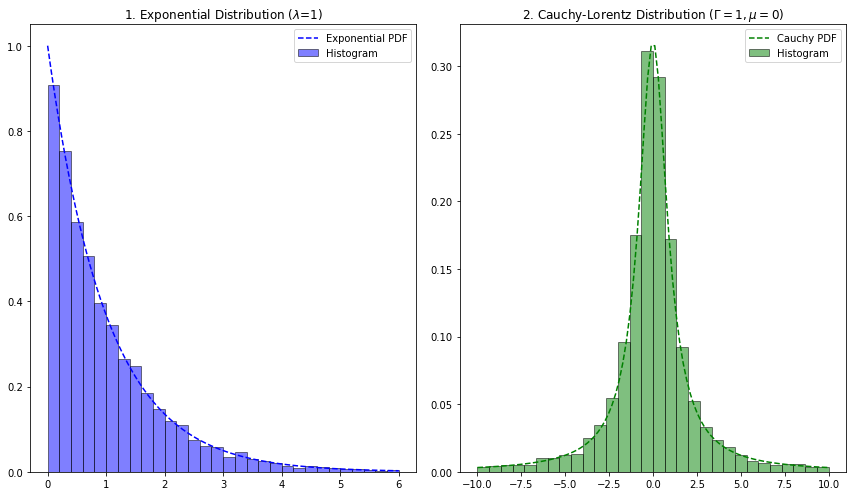

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, cauchy

# Load data
x = np.loadtxt('exponential.dat')
y = np.loadtxt('cauchy_lorentz.dat')

# Create subplots
plt.figure(figsize=(12, 7))

# NOTE: 
# the normalization density='true' is useful to avoid rescaling the function of the distribution (dashed)

# Exponential histogram
plt.subplot(1, 2, 1)
plt.hist(x, bins=30, range=(0, 6), color='blue', edgecolor='black', alpha=0.5, density=True, label='Histogram')
plt.title('1. Exponential Distribution ($\lambda$=1)')
# Exponential PDF on exponential histogram
x_range_exp = np.linspace(0, 6, 100)
exponential_pdf = expon.pdf(x_range_exp, scale=1)  # Exponential PDF with lambda=1
plt.plot(x_range_exp, exponential_pdf, color='blue', ls='dashed', label='Exponential PDF')
plt.legend()

# Cauchy-Lorentz histogram
plt.subplot(1, 2, 2)
plt.hist(y, bins=30, range=(-10, 10), color='green', edgecolor='black', alpha=0.5, density=True, label='Histogram')
plt.title('2. Cauchy-Lorentz Distribution ($\Gamma=1,\mu=0$)')
# Cauchy PDF on Cauchy-Lorentz histogram
y_range_lorentz = np.linspace(-10, 10, 100)
lorentzian_pdf = cauchy.pdf(y_range_lorentz, loc=0, scale=1)
plt.plot(y_range_lorentz, lorentzian_pdf, color='green', ls='dashed', label='Cauchy PDF')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## 01.2.2:

When construncting a linear combination $S_N$ of $N$ <font color="darkorange">statistically independent</font> and <font color="darkorange">identically distributed</font> random variables $x_i$
$$S_N = \frac{1}{N}\sum_{i=1}^N x_i$$ 
if the <font color="darkorange">variance</font> $\sigma^2$ of the $x_i$ distribution is finite, then, in the limit of $N \gg 1$, the distribution of $S_N$ <font color="darkorange">approaches a gaussian centred</font> in the mean of the original distribution and variance $\sigma^2_{S_N}=\sigma^2/N$. 


In rows 1, 2 and 3 is displayed the behaviour of three <font color="darkorange">different starting distributions</font>: uniform, exponential ($\lambda=1$) and Lorentzian ($\mu=0, \Gamma=1$). 
For increasing $N=1, 2, 10, 100$ (ideally $N \to \infty$), the gaussian profile becomes more manifest for every distribution, but for the Cauchy-Lorentz, which is a <font color="darkorange">remarkable exception</font>.

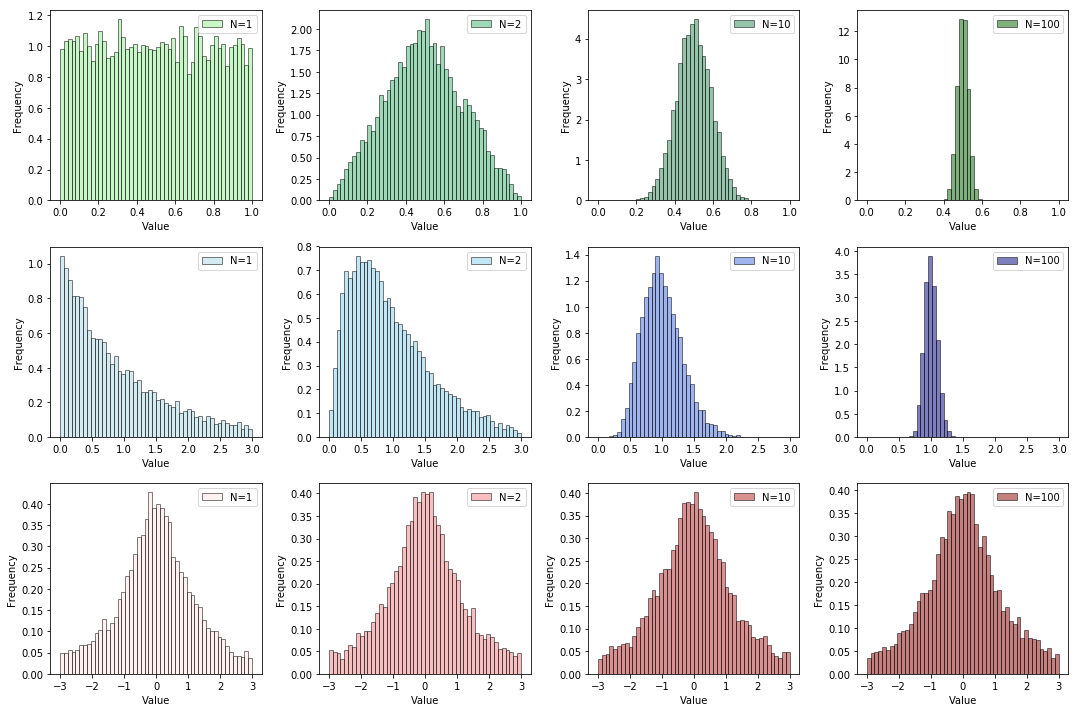

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
ud1 = np.loadtxt('uniform_dice_1.dat')
ed1 = np.loadtxt('exponential_dice_1.dat')
ld1 = np.loadtxt('lorentzian_dice_1.dat')

ud2 = np.loadtxt('uniform_dice_2.dat')
ed2 = np.loadtxt('exponential_dice_2.dat')
ld2 = np.loadtxt('lorentzian_dice_2.dat')

ud10 = np.loadtxt('uniform_dice_10.dat')
ed10 = np.loadtxt('exponential_dice_10.dat')
ld10 = np.loadtxt('lorentzian_dice_10.dat')

ud100 = np.loadtxt('uniform_dice_100.dat')
ed100 = np.loadtxt('exponential_dice_100.dat')
ld100 = np.loadtxt('lorentzian_dice_100.dat')

# Plot histograms
fig, axes = plt.subplots(3, 4, figsize=(15, 10))

# Uniform distributions
axes[0, 0].hist(ud1, bins=50, range=(0, 1), density=True, alpha=0.5, edgecolor='black', color='lightgreen', label='N=1')
axes[0, 1].hist(ud2, bins=50, range=(0, 1), density=True, alpha=0.5, edgecolor='black', color='mediumseagreen', label='N=2')
axes[0, 2].hist(ud10, bins=50, range=(0, 1), density=True, alpha=0.5, edgecolor='black', color='seagreen', label='N=10')
axes[0, 3].hist(ud100, bins=50, range=(0, 1), density=True, alpha=0.5, edgecolor='black', color='darkgreen', label='N=100')

# Exponential distributions
axes[1, 0].hist(ed1, bins=50, range=(0, 3), density=True, alpha=0.5, edgecolor='black', color='lightblue', label='N=1')
axes[1, 1].hist(ed2, bins=50, range=(0, 3), density=True, alpha=0.5, edgecolor='black', color='skyblue', label='N=2')
axes[1, 2].hist(ed10, bins=50, range=(0, 3), density=True, alpha=0.5, edgecolor='black', color='royalblue', label='N=10')
axes[1, 3].hist(ed100, bins=50, range=(0, 3), density=True, alpha=0.5, edgecolor='black', color='navy', label='N=100')

# Lorentzian distributions
axes[2, 0].hist(ld1, bins=50, range=(-3, 3), density=True, alpha=0.5, edgecolor='black', color='mistyrose', label='N=1')
axes[2, 1].hist(ld2, bins=50, range=(-3, 3), density=True, alpha=0.5, edgecolor='black', color='lightcoral', label='N=2')
axes[2, 2].hist(ld10, bins=50, range=(-3, 3), density=True, alpha=0.5, edgecolor='black', color='firebrick', label='N=10')
axes[2, 3].hist(ld100, bins=50, range=(-3, 3), density=True, alpha=0.5, edgecolor='black', color='darkred', label='N=100')

# Add labels and legends
for ax in axes.flatten():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

# <span style="color:darkorange"> 01.3: Buffon's experiment </span>

<a href="https://youtu.be/sJVivjuMfWA?si=dHCIufa51o6RxIbR">Buffon's experiment</a> is designed for <font color="darkorange">estimating $\pi$</font> by throwing needles of length $L$ onto a horizontal grating of parallel lines, distant $d>L$ from each other. It can be proven that the probability of the needle intersecting a line is $P=\frac{2 L}{\pi d}$. 

The <font color="darkorange">law of large numbers</font> ensures that $\lim_{N_{throws} \to \infty}\frac{N_{hits}}{N_{throws}}= P$ and, for a very large number of trials (here $N_{throws}=10^9$, divided into $10^3$ blocks), the experimental ratio $N^{(exp)}_{hits}/N_{throws}$ approximates the probability and, therefore, $\pi \approx \frac{2L}{d}\frac{N_{throws}}{N^{(exp)}_{hits}}$.

The simulation of a single throw is simplified by <font color="darkorange">symmetry arguments</font>: 

* assuming an infinite grating of infinite lines, the system is invariant under <font color="darkorange">translations along the direction of the lines</font>;

* the parallel lines form a discrete lattice, so a <font color="darkorange">tubular neighbourhood</font> of width $d$ around a particular line $s$ is enough to describe, minus a <font color="darkorange">discrete translation perpendicular</font> to the lines, any other point on the plane (analogous to a <a href="https://en.wikipedia.org/wiki/Unit_cell#Wigner–Seitz_cell">Wigner-Seitz cell</a>);

* the <font color="darkorange">orientation</font> of the needle can be <font color="darkorange">described by an angle $\theta$</font> restricted in $(0,\pi/2)$, since the needle is symmetric for <font color="darkorange">rotations of $\pi$</font> and the system shows the same intersection properties if <font color="darkorange">mirrored</font>.

Accordingly, a possible <font color="darkorange">procedure for throwing</font> a needle can be broken down into the following steps:

1. the <font color="darkorange">position $c$ of the centre of the needle</font> with respect to the line $s$ at the centre of the cell is uniformly extracted within $(-d/2,d/2)$;

2. to <font color="darkorange">refrain from using $\pi$</font> itself when trying to estimate $\pi$, the angle $\theta\in(0,\pi/2)$ is drawn as $\arctan\left(\frac{y}{x}\right)$, with $(x,y)$ extracted uniformly on $(0,1)\times(0,1)\cap \{x^2+y^2\leq 1\}$;

3. the needle <font color="darkorange">hits</font> the grating if $ L\sin(\theta)/2>\left|c\right|$.

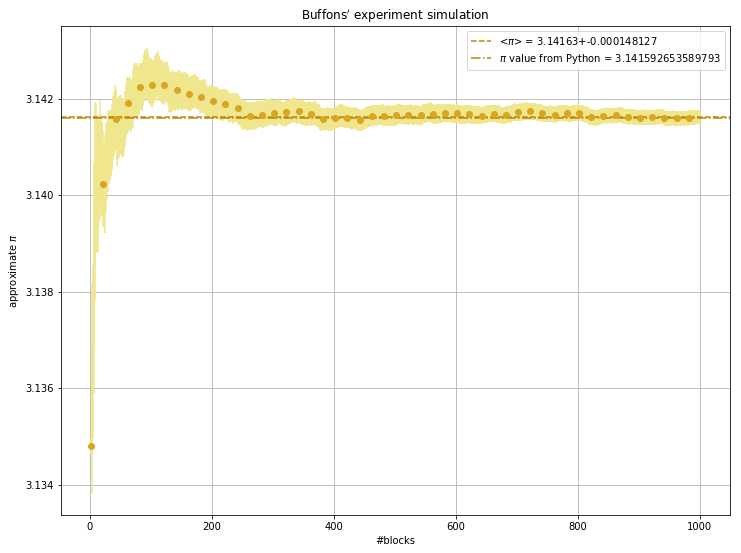

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(2, len(open('averages_PI.dat').readlines()) + 2)
y = np.loadtxt('averages_PI.dat') 
error_bars = np.loadtxt('errors_PI.dat')

plt.figure(figsize=(12, 9))
plt.errorbar(x, y, yerr=error_bars, fmt='o', color='goldenrod', ecolor='khaki', markevery=20)
mean_pi=y[-1]
plt.axhline(y=mean_pi, color='darkgoldenrod', label='<$\pi$> = '+str(mean_pi)+'+-'+str(error_bars[-1]), ls='dashed' ) #ls=linestyle
plt.axhline(y=math.pi, color='darkgoldenrod', label='$\pi$ value from Python = '+str(math.pi), ls='dashdot' ) #ls=linestyle
plt.xlabel('#blocks')
plt.ylabel('approximate $\pi$')
plt.grid(True)
plt.title('Buffons$\'$ experiment simulation')
plt.legend()
plt.show()